# Лабораторная 3 Крайников И. А.

Метрики на тестовой выборке:
Accuracy: 0.956140350877193
Precision: 0.9342105263157895
Recall: 1.0
Средняя точность на кросс-валидации: 0.9279459711224964
Наилучшее значение гиперпараметра k: {'n_neighbors': 13}
Наилучшая точность: 0.9332401800962584

Метрики на тестовой выборке с оптимальным значением k:
Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0


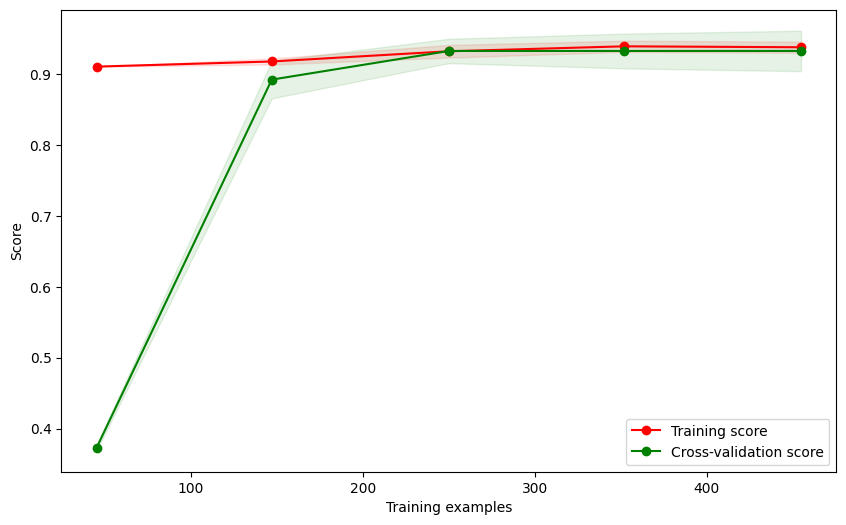

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Загрузка набора данных
data = load_breast_cancer()
X = data.data
y = data.target

# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели ближайших соседей
k = 5  # Произвольно заданный гиперпараметр k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = knn.predict(X_test)

# Оценка качества модели на тестовой выборке
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Метрики на тестовой выборке:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Кросс-валидация
cv_scores = cross_val_score(knn, X, y, cv=5)
print("Средняя точность на кросс-валидации:", np.mean(cv_scores))

# Подбор гиперпараметра k с использованием GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

print("Наилучшее значение гиперпараметра k:", grid_search.best_params_)
print("Наилучшая точность:", grid_search.best_score_)

# Повторное обучение модели с оптимальным значением k
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Оценка качества модели с оптимальным значением k
y_pred_best = knn_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)

print("\nМетрики на тестовой выборке с оптимальным значением k:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)

# Кривые обучения и валидации
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

train_sizes, train_scores, test_scores = learning_curve(
    knn_best, X, y, cv=5, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()
